In [2]:
# Adding the part of code mentioned in the pdf below

#Uses pillow (you can also use another imaging library if you want)
from PIL import Image, ImageOps, ImageFont, ImageDraw

#Load the font and set the font size to 42
font = ImageFont.truetype('habbakuk/Habbakuk.ttf', 42)

#Character mapping for each of the 27 tokens
char_map = {'Alef' : ')', 
            'Ayin' : '(', 
            'Bet' : 'b', 
            'Dalet' : 'd', 
            'Gimel' : 'g', 
            'He' : 'x', 
            'Het' : 'h', 
            'Kaf' : 'k', 
            'Kaf-final' : '\\', 
            'Lamed' : 'l', 
            'Mem' : '{', 
            'Mem-medial' : 'm', 
            'Nun-final' : '}', 
            'Nun-medial' : 'n', 
            'Pe' : 'p', 
            'Pe-final' : 'v', 
            'Qof' : 'q', 
            'Resh' : 'r', 
            'Samekh' : 's', 
            'Shin' : '$', 
            'Taw' : 't', 
            'Tet' : '+', 
            'Tsadi-final' : 'j', 
            'Tsadi-medial' : 'c', 
            'Waw' : 'w', 
            'Yod' : 'y', 
            'Zayin' : 'z'}

#Returns a grayscale image based on specified label of img_size
def create_image(label, img_size):
    if (label not in char_map):
        raise KeyError('Unknown label!')

    #Create blank image and create a draw interface
    img = Image.new('L', img_size, 255)    
    draw = ImageDraw.Draw(img)

    #Get size of the font and draw the token in the center of the blank image
    left, top, right, bottom = font.getbbox(char_map[label])
    w = right - left
    h = bottom - top       
    draw.text(((img_size[0]-w)/2, (img_size[1]-h)/2), char_map[label], 0, font)

    return img

#Create a 50x50 image of the Alef token and save it to disk
#To get the raw data cast it to a numpy array
img = create_image('Alef', (50, 50))
img.save('example_alef.png')

<h1>Preprocess and segment</h1>

<>:34: SyntaxWarning: invalid escape sequence '\P'
<>:34: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_808\2603251943.py:34: SyntaxWarning: invalid escape sequence '\P'
  example_text_image_pillow = Image.open("image-data\P166-Fg007-R-C01-R01-binarized.jpg")


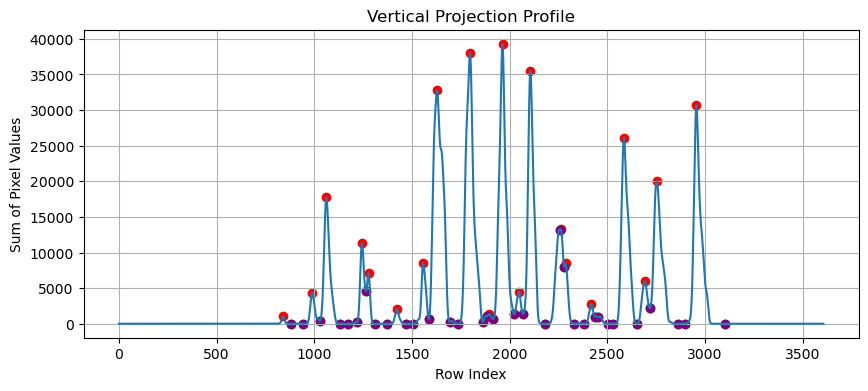

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks
import PIL.ImageOps
import math

def filter_between_peaks(greens, reds):
    #add new conditional to reduce duplicate locations
    max_red = reds[-1]
    min_red = reds[0]
    keeped_peaks = []

    # Keep greens between first and last red
    for i in greens:
        if min_red <= i <= max_red:
            keeped_peaks.append(i)
    # Add the second green below min_red
    below = [g for g in greens if g < min_red]
    if len(below) >= 2:
        keeped_peaks.insert(0, below[-2])  # second closest below

    # Add the second green above max_red
    above = [g for g in greens if g > max_red]
    if len(above) >= 2:
        keeped_peaks.append(above[1])  # second closest above

    return keeped_peaks



example_text_image_pillow = Image.open("image-data\P166-Fg007-R-C01-R01-binarized.jpg")

def horizontalProjectionAndSkewAlignment(image, skew_range = 15): #line segmentation and skew alignment 
    skews = range(-skew_range,skew_range)
    skew_val = 0
    peaks_locs = None
    num_peaks = math.inf
    for skew in skews:
        temp_rotated_image  = image.rotate(skew,fillcolor = 'white')
        projection = np.sum(temp_rotated_image, axis=1)
        smoothed_projection = gaussian_filter1d(projection, sigma=6)
        inverted_projection = np.max(smoothed_projection) - smoothed_projection
        peaks, _  = find_peaks(inverted_projection, prominence=200) 
        current_num_peaks = len(peaks)
        if  current_num_peaks < num_peaks:
            skew_val = skew
            peaks_locs = peaks
            peaks_final, _ = find_peaks(smoothed_projection)
    plt.figure(figsize=(10, 4))
    plt.plot(inverted_projection)
    plt.scatter(peaks, [inverted_projection[peak] for peak in peaks], color='red', label='peak')
    plt.scatter(peaks_final,[inverted_projection[peak] for peak in peaks_final], color='green', label='white peak')
    line_peaks = filter_between_peaks(peaks_final, peaks_locs)
    plt.scatter(peaks_final,[inverted_projection[peak] for peak in peaks_final], color='purple', label='white peak')
    plt.title("Vertical Projection Profile")
    plt.xlabel("Row Index")
    plt.ylabel("Sum of Pixel Values")
    plt.grid(True)
    plt.show()
    return skew_val, line_peaks, temp_rotated_image


#def verticalProjection(image, line_peaks): #word segementation by line, without skew alignment
  #  plt.figure(figsize=(10, 4))
  #  for line, i in enumerate(line_peaks):
  #      plt.imshow(image[line], cmap='gray')
        #plt.plot(inverted_projection)
        #projection = np.sum(image[i], axis=0)
        #smoothed_projection = gaussian_filter1d(projection, sigma=10)
        #inverted_projection = np.max(smoothed_projection) - smoothed_projection
        #word_peaks, _  = find_peaks(inverted_projection, prominence=1000)
        #plt.figure(figsize=(10, 4))
        #plt.plot(inverted_projection)
        #plt.scatter(word_peaks, [inverted_projection[peak] for peak in word_peaks], color='red', label='peak')
  #  return word_peaks

skew_val, line_peaks, rotated_image = horizontalProjectionAndSkewAlignment(example_text_image_pillow, 5)
#word_peaks = verticalProjection(rotated_image)


In [46]:
skew_val
line_peaks

[np.int64(880),
 np.int64(942),
 np.int64(1029),
 np.int64(1132),
 np.int64(1172),
 np.int64(1217),
 np.int64(1265),
 np.int64(1313),
 np.int64(1373),
 np.int64(1469),
 np.int64(1504),
 np.int64(1587),
 np.int64(1695),
 np.int64(1736),
 np.int64(1863),
 np.int64(1884),
 np.int64(1916),
 np.int64(2024),
 np.int64(2069),
 np.int64(2180),
 np.int64(2257),
 np.int64(2281),
 np.int64(2329),
 np.int64(2383),
 np.int64(2437),
 np.int64(2453),
 np.int64(2504),
 np.int64(2531),
 np.int64(2652),
 np.int64(2719),
 np.int64(2864),
 np.int64(2899)]

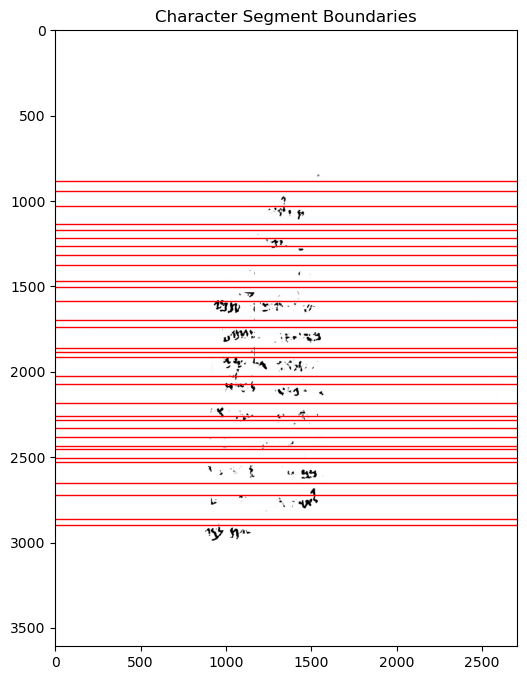

In [47]:
plt.figure(figsize=(10, 8))
plt.imshow(example_text_image_pillow, cmap='gray')
for peak in line_peaks:
    plt.axhline(peak, color='red', linestyle='-', linewidth=1)
plt.title("Character Segment Boundaries")
plt.show()

<h2>Formatting for yolo</h2>

In [ ]:
#given an image of one line of text of joined letters that are maybe padded to a square,
#and a set of bouding boxes for each letter in the image - format to creaTe yolo compatible labels
# input: e.g.{'bboxes': [{'class': 'alef', 'xmin': 20, 'ymin': 109, 'xmax': 81, 'ymax': 237}, {'class': 'het', 'xmin': 116, 'ymin': 162, 'xmax': 163, 'ymax': 272}, {'class': 'he', 'xmin': 189, 'ymin': 189, 'xmax': 233, 'ymax': 295}], 'filename': 'text_line1.png', 'image_size': (267, 400, 1)}
#output- for each letter in input image: image_id, center_x, center_y, width, height), e.g. (0 0.190 0.433 0.228 0.320)
import os

##need toa add all letters and the variants (middle, end etc)
class_name_to_id_mapping = {
    "alef": 0, "ayin": 1,"bet": 2, "dalet": 3, "gimel": 4, "he": 5,
    "het": 6,"kaf": 7,"kaf_final": 8,"lamed": 9, "mem": 10, "mem-medial": 11, 
    "nun_final": 12,"nun_medial": 13, "pe": 14,"pe_final": 15,
    "qof": 16, "resh": 17, "samekh": 18, "shin": 19,
    "taw": 20, "tet": 21, "tsadi_final": 22, "tsadi_medial": 23,
    "waw": 24, "yod": 25, "zayin": 26 
}

#info_dict = bboxes dictonary
#split = add file to trainining or validation s
def convert_to_yolov5(info_dict, split): 
    label_lines = []
    
    # For each bounding box i.e. letter in the text_line image
    for b in info_dict["bboxes"]:
        try:
            class_id = class_name_to_id_mapping[b["class"]]
        except KeyError:
            print("Invalid Class. Must be one from ", class_name_to_id_mapping.keys())
        
        # Transform the bbox co-ordinates as per the format required by YOLO v5
        b_center_x = (b["xmin"] + b["xmax"]) / 2 
        b_center_y = (b["ymin"] + b["ymax"]) / 2
        b_width    = (b["xmax"] - b["xmin"])
        b_height   = (b["ymax"] - b["ymin"])
        
        # Normalise the co-ordinates by the dimensions of the image
        image_w, image_h, image_c = info_dict["image_size"]  
        b_center_x /= image_w 
        b_center_y /= image_h 
        b_width    /= image_w 
        b_height   /= image_h 
        
        #Write the bbox details to the file 
        label_lines.append("{} {:.3f} {:.3f} {:.3f} {:.3f}".format(class_id, b_center_x, b_center_y, b_width, b_height))
        
    # Name of the file which we have to save, and destination folder
    save_dir = os.path.join("labels", split)
    os.makedirs(save_dir, exist_ok=True)
    save_file_name = os.path.join(save_dir, info_dict["filename"].replace("png", "txt"))
    
    # Save the annotation to disk, in destination folder: "labels/{train/val}"
    print("\n".join(label_lines), file= open(save_file_name, "w")) 
    return label_lines #sanity test

#Testing
text_line = { #nb! should it be reversed or ordered differently for formatting? keep the order in mind
    "bboxes": [
        {"class": "yod", "xmin": 10, "ymin": 50, "xmax": 50, "ymax": 120},
        {"class": "tsadi_final", "xmin": 60, "ymin": 50, "xmax": 110, "ymax": 120},
        {"class": "qof", "xmin": 120, "ymin": 50, "xmax": 170, "ymax": 120},
        {"class": "bet", "xmin": 180, "ymin": 50, "xmax": 220, "ymax": 120},
        {"class": "dalet", "xmin": 230, "ymin": 50, "xmax": 270, "ymax": 120},
        {"class": "ayin", "xmin": 280, "ymin": 50, "xmax": 320, "ymax": 120},
        {"class": "mem", "xmin": 330, "ymin": 50, "xmax": 370, "ymax": 120},
        {"class": "alef", "xmin": 380, "ymin": 50, "xmax": 420, "ymax": 120},
        {"class": "yod", "xmin": 430, "ymin": 50, "xmax": 470, "ymax": 120},
        {"class": "bet", "xmin": 480, "ymin": 50, "xmax": 520, "ymax": 120},
        {"class": "he", "xmin": 530, "ymin": 50, "xmax": 570, "ymax": 120},
        {"class": "taw", "xmin": 580, "ymin": 50, "xmax": 620, "ymax": 120},
        {"class": "alef", "xmin": 630, "ymin": 50, "xmax": 670, "ymax": 120},
        {"class": "alef", "xmin": 680, "ymin": 50, "xmax": 720, "ymax": 120},
        {"class": "waw", "xmin": 730, "ymin": 50, "xmax": 770, "ymax": 120},
        {"class": "lamed", "xmin": 780, "ymin": 50, "xmax": 820, "ymax": 120},
        {"class": "yod", "xmin": 830, "ymin": 50, "xmax": 870, "ymax": 120},
        {"class": "kaf", "xmin": 880, "ymin": 50, "xmax": 920, "ymax": 120},
        {"class": "kaf_final", "xmin": 930, "ymin": 50, "xmax": 970, "ymax": 120},
        {"class": "resh", "xmin": 980, "ymin": 50, "xmax": 1020, "ymax": 120},
        {"class": "bet", "xmin": 1030, "ymin": 50, "xmax": 1070, "ymax": 120},
        {"class": "dalet", "xmin": 1080, "ymin": 50, "xmax": 1120, "ymax": 120}
    ],
    "filename": "text_line1.png",
    "image_size": (1200, 150, 1)  # (width, height, channels)
}

labels = convert_to_yolov5(text_line, split="train")

